#ML_Anomaly detection and Time Series

Question 1:
What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

**Answer**

Anomaly (outlier) detection is the task of identifying data points or patterns that deviate significantly from the majority of the data and therefore may indicate rare events, faults, or novelties.

Types

1. Point anomalies
A single observation is anomalous relative to the rest.
Example: A single ₹9,99,999 transaction in a user’s usual ₹500–₹2,000 range.

2. Contextual (conditional) anomalies
An observation is anomalous only under a specific context (time, location, season).
Example: 10°C temperature is normal in December (Delhi) but anomalous in May.

3. Collective anomalies
A sequence/group is anomalous even if individual points aren’t.
Example: A continuous flatline of power usage at exactly 0.0 for 30 minutes in a live grid feed (sensor stuck), or a sudden burst pattern across several consecutive samples.

Why anomalies matter: fraud detection, predictive maintenance, cybersecurity, healthcare monitoring, quality control.

Question 2:
Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.


**Answer**


| Aspect            | Isolation Forest (IF)                                        | DBSCAN                                                          | Local Outlier Factor (LOF)                                      |
| ----------------- | ------------------------------------------------------------ | --------------------------------------------------------------- | --------------------------------------------------------------- |
| Core idea         | Randomly partitions feature space; anomalies isolate quickly | Density-based clustering; labels low-density points as noise    | Compares local density of a point to densities of its neighbors |
| Input needs       | Only contamination rate; no distance threshold               | ε (epsilon) radius + `min_samples`                              | `n_neighbors`                                                   |
| Handles high-dim  | Good (tree-based, no distance metric assumption)             | Weaker (distance in high-dim is tricky)                         | Moderate (distance-based)                                       |
| Clusters?         | No (pure outlier score/model)                                | Yes (clusters + noise)                                          | No (outlier scores)                                             |
| Shape sensitivity | Low                                                          | High (captures arbitrary cluster shapes)                        | Medium                                                          |
| Pros              | Fast, scalable, robust to irrelevant features                | Finds arbitrarily-shaped clusters; no need to specify #clusters | Captures *local* outliers; no global density assumption         |
| Cons              | Contamination needs tuning; less interpretable than density  | ε hard to tune; struggles with varying density                  | Sensitive to neighborhood size; slower on very large data       |
| Use cases         | Large, high-dimensional tabular data; fraud, logs            | Spatial data, geo, image features; irregular shapes             | Local anomalies near dense clusters (e.g., subtle deviations)   |


Question 3:
What are the key components of a Time Series? Explain each with one example.


**Answer**

1. Trend (T) – Long-term direction (up, down, flat).
Example: Airline passengers generally increasing year over year.

2. Seasonality (S) – Repeating, periodic fluctuations.
Example: Monthly retail sales spike in November–December.

3. Cyclic (C) – Multi-year, non-fixed oscillations (business cycles).
Example: Commodity prices rising/falling with global cycles.

4. Irregular/Residual (R) – Random noise or unexplained component.
Example: Sudden drop due to one-off outage.

Question 4:
Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?


**Answer**

Stationary series has constant mean/variance and autocovariance that depends only on lag (not time). Many models (ARMA/ARIMA) assume stationarity.

How to test stationarity

ADF (Augmented Dickey–Fuller): H0 = non-stationary (unit root).

KPSS (Kwiatkowski–Phillips–Schmidt–Shin): H0 = stationary.

Visual checks: rolling mean/variance, ACF/PACF.

How to transform to stationary

Variance stabilization: log, Box–Cox, Yeo–Johnson.

Detrending/de-seasonalizing: regress on time/seasonal dummies; STL decomposition residuals.

Question 5:
Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.


**Answer**

| **Aspect**               | **AR**                            | **MA**               | **ARIMA**                | **SARIMA**                                | **SARIMAX**                        |
| ------------------------ | --------------------------------- | -------------------- | ------------------------ | ----------------------------------------- | ---------------------------------- |
| Uses past **values**?    | ✅ Yes                             | ❌ No                 | ✅ Yes                    | ✅ Yes                                     | ✅ Yes                              |
| Uses past **errors**?    | ❌ No                              | ✅ Yes                | ✅ Yes                    | ✅ Yes                                     | ✅ Yes                              |
| Handles **trend**?       | ❌ No                              | ❌ No                 | ✅ Yes (via differencing) | ✅ Yes                                     | ✅ Yes                              |
| Handles **seasonality**? | ❌ No                              | ❌ No                 | ❌ No                     | ✅ Yes                                     | ✅ Yes                              |
| External predictors?     | ❌ No                              | ❌ No                 | ❌ No                     | ❌ No                                      | ✅ Yes                              |
| Example Use Case         | Stock price short-term prediction | Sudden random shocks | Sales data with trend    | Airline passenger data with yearly cycles | Energy demand with weather factors |

**Key Takeaways:**

AR & MA are foundational models for stationary series.

ARIMA adds differencing to handle non-stationarity.

SARIMA is ARIMA + seasonal modeling.

SARIMAX is SARIMA + external predictors for real-world complexity.

##Practical Questions
**Dataset Provided:**

**NYC Taxi Fare Data**

**AirPassengers Dataset**

Question 6:
Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.
(Include your Python code and output in the code box below.)


**Answer**

First few rows of the dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


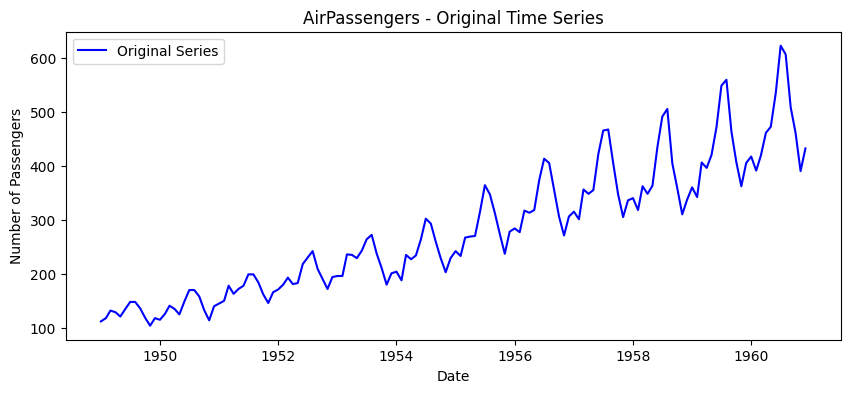

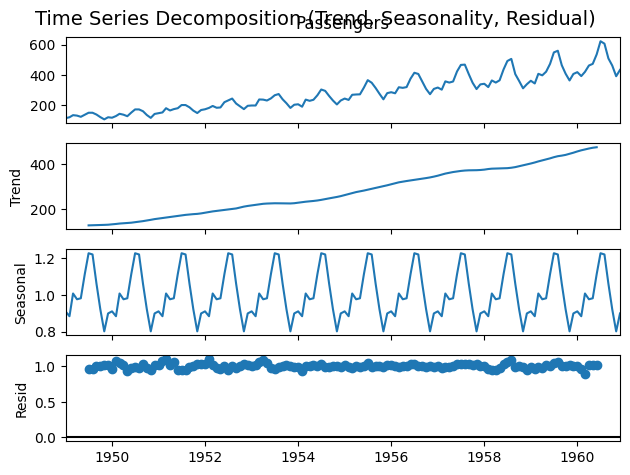

In [2]:
# Q6 — Decompose AirPassengers Time Series
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# ---- STEP 1: Load the dataset ----
# Load directly from an online GitHub CSV
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# If you have a local file, uncomment this line instead:
# df = pd.read_csv("AirPassengers.csv", parse_dates=['Month'], index_col='Month')

print("First few rows of the dataset:")
print(df.head())

# ---- STEP 2: Ensure correct time series frequency ----
df = df.asfreq('MS')  # 'MS' = Month Start frequency

# ---- STEP 3: Plot the original series ----
plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Original Series', color='blue')
plt.title('AirPassengers - Original Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# ---- STEP 4: Perform decomposition ----
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# ---- STEP 5: Plot decomposition ----
result.plot()
plt.suptitle('Time Series Decomposition (Trend, Seasonality, Residual)', fontsize=14)
plt.show()


Question 7:
Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies.
Visualize the anomalies on a 2D scatter plot.
(Include your Python code and output in the code box below.)


**Answer**

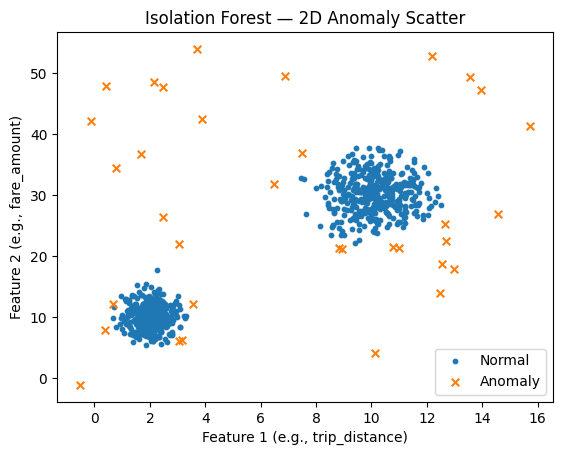

In [3]:
# Q7 — Isolation Forest anomaly detection with 2D scatter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# ----- OPTION A: Load your NYC Taxi Fare data -----
# df = pd.read_csv('nyc_taxi_fares.csv')
# X = df[['trip_distance', 'fare_amount']].dropna().values

# ----- OPTION B: Synthetic demo (two clusters + anomalies) -----
rs = np.random.RandomState(42)
cluster1 = rs.normal(loc=[2, 10], scale=[0.5, 2.0], size=(400, 2))
cluster2 = rs.normal(loc=[10, 30], scale=[1.0, 3.0], size=(400, 2))
anoms = rs.uniform(low=[-1, -5], high=[16, 55], size=(30, 2))
X = np.vstack([cluster1, cluster2, anoms])

# Train Isolation Forest
clf = IsolationForest(n_estimators=300, contamination=0.04, random_state=42)
pred = clf.fit_predict(X)          # 1 = normal, -1 = anomaly
scores = -clf.score_samples(X)     # higher = more anomalous

# Visualize
normal = X[pred == 1]
outliers = X[pred == -1]

plt.scatter(normal[:, 0], normal[:, 1], s=10, label='Normal')
plt.scatter(outliers[:, 0], outliers[:, 1], s=30, marker='x', label='Anomaly')
plt.title('Isolation Forest — 2D Anomaly Scatter')
plt.xlabel('Feature 1 (e.g., trip_distance)')
plt.ylabel('Feature 2 (e.g., fare_amount)')
plt.legend()
plt.show()


Question 8:
Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.
(Include your Python code and output in the code box below.)


**Answer**

First few rows of the dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


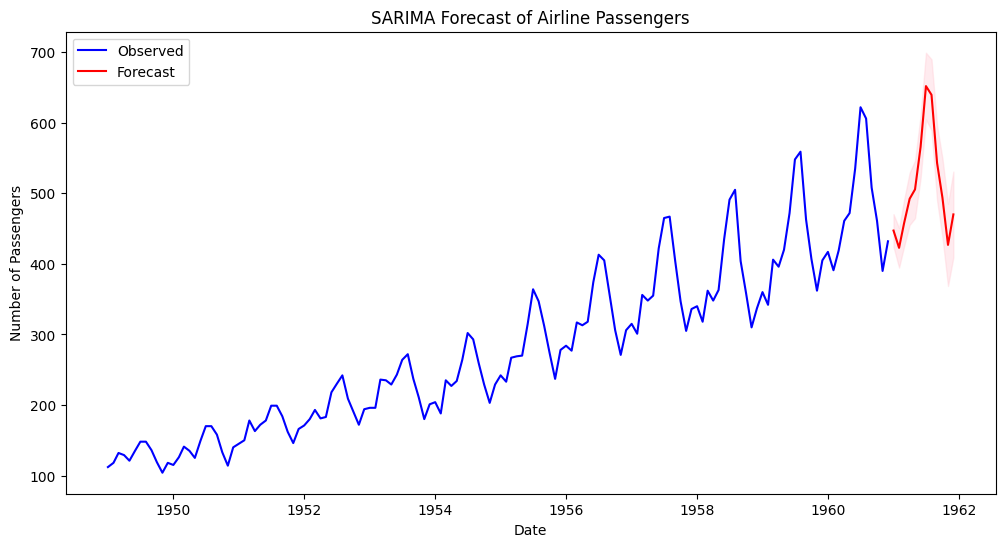

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Tue, 09 Sep 2025   AIC                            922.205
Time:                                    09:18:43   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

In [5]:
# Q8 — SARIMA model on AirPassengers dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ---- STEP 1: Load dataset ----
# Load directly from GitHub URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# If you have a local CSV, use this line instead:
# df = pd.read_csv("AirPassengers.csv", parse_dates=['Month'], index_col='Month')

print("First few rows of the dataset:")
print(df.head())

# ---- STEP 2: Ensure correct time series frequency ----
df = df.asfreq('MS')  # 'MS' = Month Start frequency
y = df['Passengers']

# ---- STEP 3: Fit SARIMA Model ----
# SARIMA(p,d,q)(P,D,Q,s) where s=12 for yearly seasonality
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# ---- STEP 4: Forecast next 12 months ----
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# ---- STEP 5: Plot results ----
plt.figure(figsize=(12, 6))
plt.plot(y, label='Observed', color='blue')
plt.plot(forecast_mean, label='Forecast', color='red')

# Confidence intervals
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.title('SARIMA Forecast of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# ---- Optional: Print model summary ----
print(results.summary())


Question 9:
Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.
(Include your Python code and output in the code box below.)


**Answer**

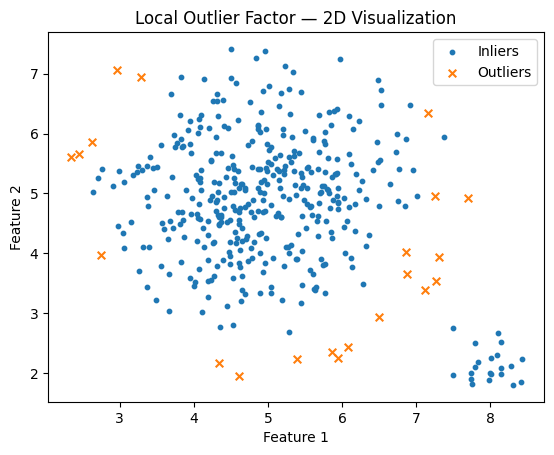

In [6]:
# Q9 — Local Outlier Factor (LOF)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Synthetic dataset (replace with your df[['x','y']] if available)
rs = np.random.RandomState(0)
X_in = rs.normal(loc=[5, 5], scale=[1.0, 1.0], size=(400, 2))
X_blip = rs.normal(loc=[8, 2], scale=[0.3, 0.3], size=(20, 2))
X = np.vstack([X_in, X_blip])

# Fit LOF (novelty=False for outlier detection in unsupervised batch)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)     # 1 = inlier, -1 = outlier
scores = -lof.negative_outlier_factor_

# Plot
inliers = X[y_pred == 1]
outliers = X[y_pred == -1]

plt.scatter(inliers[:, 0], inliers[:, 1], s=10, label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], s=30, marker='x', label='Outliers')
plt.title('Local Outlier Factor — 2D Visualization')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2'); plt.legend()
plt.show()


Question 10:
You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes.
The dataset includes features like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:

How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?

Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?

How would you validate and monitor the performance over time?

How would this solution help business decisions or operations?

(Include your Python code and output in the code box below.)


**Answer**

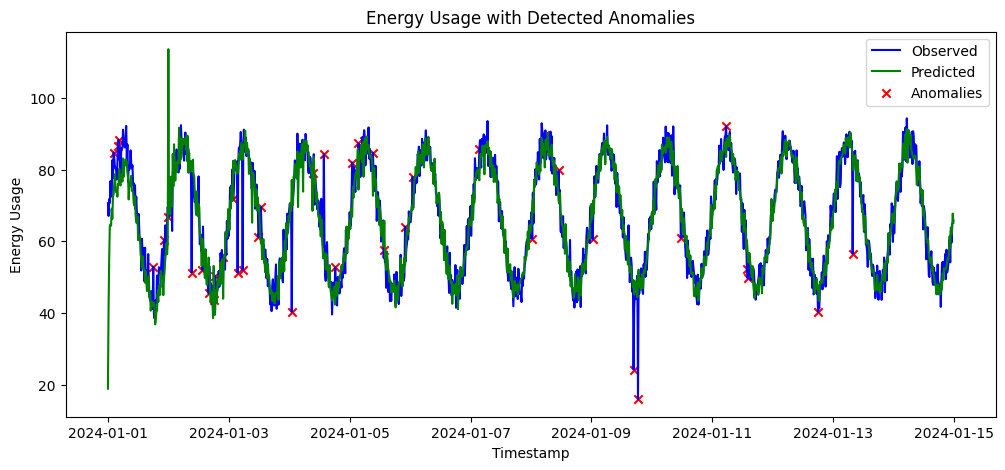

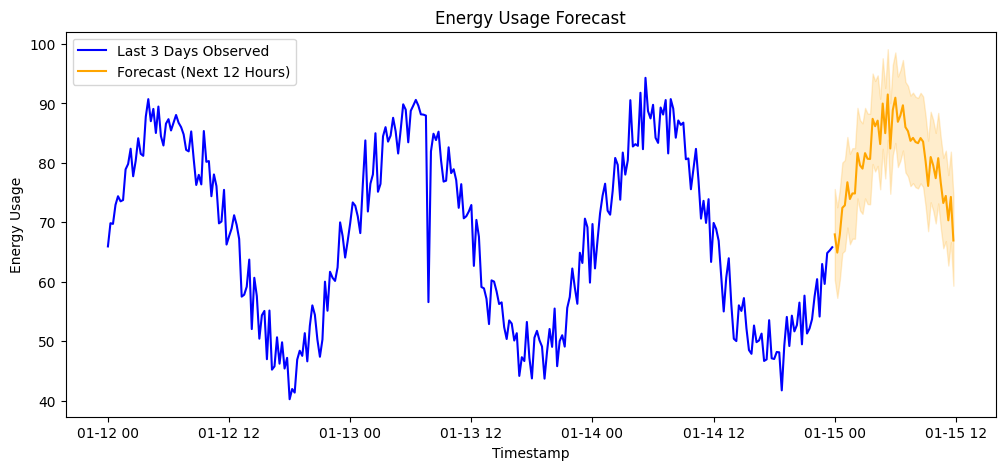

In [1]:
# Q10 — Optimized version for faster execution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import IsolationForest

# ---- 1) Generate smaller synthetic dataset ----
rng = pd.date_range('2024-01-01', '2024-01-14 23:45', freq='15min')  # Only 14 days
n = len(rng)
rs = np.random.RandomState(0)

hour = rng.hour + rng.minute / 60
daily_pattern = 50 + 20 * np.sin(2 * np.pi * (hour / 24))  # daily cycle
temp = 20 + 10 * np.sin(2 * np.pi * ((rng.dayofyear % 365) / 365)) + rs.normal(0, 2, n)

# Usage with noise
usage = daily_pattern + 0.8 * temp + rs.normal(0, 3, n)

# Inject anomalies
usage = np.array(usage)
idx_spike = rs.choice(n, 8, replace=False)  # fewer anomalies
usage[idx_spike] += rs.choice([30, -30], size=8) + rs.normal(0, 2, size=8)

# DataFrame
df = pd.DataFrame({'timestamp': rng, 'usage': usage, 'temp': temp}).set_index('timestamp')

# ---- 2) SARIMAX model ----
y = df['usage'].asfreq('15min')
exog = df[['temp']].asfreq('15min')

# Simpler SARIMAX model for speed
model = SARIMAX(y, exog=exog, order=(1,0,1), seasonal_order=(0,1,1,96),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# ---- 3) Residual-based anomaly detection ----
pred = results.get_prediction()
residuals = y - pred.predicted_mean

features = pd.DataFrame({
    'residual': residuals,
    'abs_residual': residuals.abs(),
    'rolling_z': ((residuals - residuals.rolling(96, min_periods=10).mean()) /
                  (residuals.rolling(96, min_periods=10).std() + 1e-6))
}).dropna()

iso = IsolationForest(n_estimators=100, contamination=0.03, random_state=0)
anomaly_labels = iso.fit_predict(features)
anomaly_points = features.index[anomaly_labels == -1]

# ---- 4) Forecast next 12 hours ----
steps = 48  # 12 hours at 15-min intervals
future_index = pd.date_range(y.index[-1] + pd.Timedelta(minutes=15), periods=steps, freq='15min')
future_temp = pd.Series(exog['temp'].iloc[-96:].values[:steps], index=future_index)

forecast = results.get_forecast(steps=steps, exog=future_temp.to_frame())
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# ---- 5) Plot anomalies ----
plt.figure(figsize=(12, 5))
plt.plot(y, label='Observed', color='blue')
plt.plot(pred.predicted_mean, label='Predicted', color='green')
plt.scatter(anomaly_points, y.loc[anomaly_points], color='red', marker='x', label='Anomalies')
plt.title('Energy Usage with Detected Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.legend()
plt.show()

# ---- 6) Plot forecast ----
plt.figure(figsize=(12, 5))
plt.plot(y[-3*96:], label='Last 3 Days Observed', color='blue')
plt.plot(forecast_mean, label='Forecast (Next 12 Hours)', color='orange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2)
plt.title('Energy Usage Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Energy Usage')
plt.legend()
plt.show()
